In [1]:
%matplotlib inline


==================
ENN, RENN, All-KNN
==================

An illustration of the ENN, RENN, and All-KNN method.




Automatically created module for IPython interactive environment
ENN
Reduced 13.00%
RENN
Reduced 20.00%
AllKNN
Reduced 15.00%


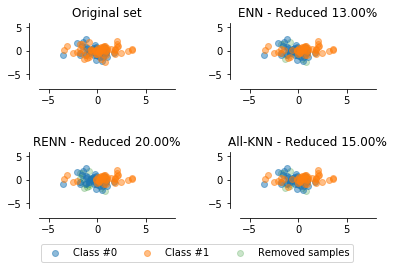

In [2]:
# Authors: Dayvid Oliveira
#          Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.under_sampling import (AllKNN, EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours)

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=0.4, weights=[0.4, 0.6],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=5, n_clusters_per_class=1,
                           n_samples=100, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Three subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')

# Apply the ENN
print('ENN')
enn = EditedNearestNeighbours(return_indices=True)
X_resampled, y_resampled, idx_resampled = enn.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)
idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]), idx_resampled)
reduction_str = ('Reduced {:.2f}%'.format(100 * (1 - float(len(X_resampled)) /
                                                 len(X))))
print(reduction_str)
c3 = ax2.scatter(X_vis[idx_samples_removed, 0],
                 X_vis[idx_samples_removed, 1],
                 alpha=.2, label='Removed samples', c='g')
plot_resampling(ax2, X_res_vis, y_resampled, 'ENN - ' + reduction_str)

# Apply the RENN
print('RENN')
renn = RepeatedEditedNearestNeighbours(return_indices=True)
X_resampled, y_resampled, idx_resampled = renn.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)
idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]), idx_resampled)
reduction_str = ('Reduced {:.2f}%'.format(100 * (1 - float(len(X_resampled)) /
                                                 len(X))))
print(reduction_str)
ax3.scatter(X_vis[idx_samples_removed, 0],
            X_vis[idx_samples_removed, 1],
            alpha=.2, label='Removed samples', c='g')
plot_resampling(ax3, X_res_vis, y_resampled, 'RENN - ' + reduction_str)

# Apply the AllKNN
print('AllKNN')
allknn = AllKNN(return_indices=True)
X_resampled, y_resampled, idx_resampled = allknn.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)
idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]), idx_resampled)
reduction_str = ('Reduced {:.2f}%'.format(100 * (1 - float(len(X_resampled)) /
                                                 len(X))))
print(reduction_str)
ax4.scatter(X_vis[idx_samples_removed, 0],
            X_vis[idx_samples_removed, 1],
            alpha=.2, label='Removed samples', c='g')
plot_resampling(ax4, X_res_vis, y_resampled, 'All-KNN - ' + reduction_str)

plt.figlegend((c0, c1, c3), ('Class #0', 'Class #1', 'Removed samples'),
              loc='lower center', ncol=3, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()